In [1]:
# final 7th version
# ***visualizations after cell 33 ***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
mushroom_raw_df = pd.read_csv("/Users/eupirate/Desktop/CA_data_exp_visdual/mush.csv")
mushroom_raw_df.head(10)

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.973096463,03/07/2021,03/02/2021,49,C
1,?,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,?,03/05/2023,03/04/2023,13,F
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,?,gray,orange,partial,orange,1.977619113,01/08/2022,01/04/2022,10,C
3,4,sunken,gray,narrow,tapering,?,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.272762762,02/10/2023,02/02/2023,22,C
4,5,flat,red,?,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.718873785,01/09/2023,01/04/2023,9,C
5,6,bell,?,narrow,tapering,grasses,poisonous,6,yellow,several,...,?,orange,white,universal,orange,14.02415593,04/11/2023,04/05/2023,21,C
6,7,flat,brown,broad,tapering,woods,?,5,yellow,scattered,...,scaly,white,white,universal,white,4.320348762,02/08/2023,02/04/2023,13,C
7,8,sunken,red,narrow,enlarging,urban,?,3,yellow,several,...,?,gray,orange,partial,yellow,1.450596518,02/07/2023,02/05/2023,2,C
8,9,?,yellow,narrow,?,grasses,edible,7,yellow,solitary,...,fibrous,brown,gray,?,orange,3.545415336,01/07/2023,01/01/2023,8,C
9,10,bell,?,broad,tapering,paths,poisonous,3,white,?,...,scaly,white,white,universal,yellow,3.866757255,04/05/2023,04/01/2023,10,C


In [4]:
# Handle Mushroom ID column indexing
mushroom_raw_df["Mushroom ID"] = mushroom_raw_df.index+1
#print(mushroom_raw_df.iloc[:16])

In [5]:
# mushroom categorical columns
mushroom_raw_df.replace("?",np.nan,inplace=True)

# Include Edibility Column
'''
df_bool = mushroom_raw_df[["Cap Shape","Cap Color","Gill Size","Stalk Shape",
                            "Habitat","Edibility","Spore Print Color","Population",
                            "Odor","Bruising","Ring Type","Stalk Surface Above Ring","Stalk Surface Below Ring",
                            "Stalk Color Above Ring","Stalk Color Below Ring","Veil Type","Veil Color",
                            ]].isna()
#print(df_bool)
df_bool.isnull().sum()
'''


# Exclude Edibility Column
df_bool = mushroom_raw_df[["Cap Shape","Cap Color","Gill Size","Stalk Shape",
                            "Habitat","Spore Print Color","Population",
                            "Odor","Bruising","Ring Type","Stalk Surface Above Ring","Stalk Surface Below Ring",
                            "Stalk Color Above Ring","Stalk Color Below Ring","Veil Type","Veil Color",
                           ]].isna()
#print(df_bool)
df_bool.isnull().sum()

Cap Shape                   0
Cap Color                   0
Gill Size                   0
Stalk Shape                 0
Habitat                     0
Spore Print Color           0
Population                  0
Odor                        0
Bruising                    0
Ring Type                   0
Stalk Surface Above Ring    0
Stalk Surface Below Ring    0
Stalk Color Above Ring      0
Stalk Color Below Ring      0
Veil Type                   0
Veil Color                  0
dtype: int64

In [6]:
# include NaN, run describe()
mushroom_raw_df.describe()

,Mushroom ID,Temperature
count,1000.000000,1000.000000
mean,500.500000,14.666000
std,288.819436,8.698742
min,1.000000,0.000000
25%,250.750000,7.000000
50%,500.500000,15.000000
75%,750.250000,22.000000
max,1000.000000,49.000000


In [7]:
# now we drop all rows with any NaN values
mushroom_drop_NaN = mushroom_raw_df.dropna()
mushroom_drop_NaN.describe()

,Mushroom ID,Temperature
count,131.000000,131.000000
mean,524.580153,14.519084
std,298.132184,8.966048
min,1.000000,0.000000
25%,233.000000,7.500000
50%,544.000000,13.000000
75%,789.000000,22.500000
max,995.000000,49.000000


# Before dropping NaN, we had 1000 rows of data, after dropped NaN, we only have 119 rows of data to work with, which is not a good representation of the dataset. I think we should explore other approaches to replace with NaN values.

# Identified those columns are mushroom's feature categorical columns, we choose to apply mode to replace NaN with the most common value of a column.

# With a better understanding of the data, Edibility column is excluded from the mode replacement, as we don't want to misclassify or make inaccurate predictions, mushroom's edibility safely is the highest priority.

In [8]:
# Exclude Edibility Column, it will be handled seprately soon.
for column in mushroom_raw_df.select_dtypes(include="object").columns:
    if column != "Edibility":
        mushroom_raw_df[column].fillna(mushroom_raw_df[column].mode()[0], inplace=True)
#print(mushroom_raw_df)
#mushroom_raw_df.head(21)
#mushroom_raw_df.describe()

In [9]:
# make a copy of df - which excluded 'Edibility' column
mushroom_raw_df_tr=mushroom_raw_df.copy()
mushroom_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mushroom ID               1000 non-null   int64 
 1   Cap Shape                 1000 non-null   object
 2   Cap Color                 1000 non-null   object
 3   Gill Size                 1000 non-null   object
 4   Stalk Shape               1000 non-null   object
 5   Habitat                   1000 non-null   object
 6   Edibility                 887 non-null    object
 7   Market Demand             1000 non-null   object
 8   Spore Print Color         1000 non-null   object
 9   Population                1000 non-null   object
 10  Odor                      1000 non-null   object
 11  Bruising                  1000 non-null   object
 12  Ring Type                 1000 non-null   object
 13  Stalk Surface Above Ring  1000 non-null   object
 14  Stalk Surface Below Ring 

In [10]:
# create a treated 'Edibility_Tr1' column hardcode "NotDefined"
'''
mushroom_raw_df_tr=mushroom_raw_df.copy()
mushroom_raw_df_tr["Edibility_Tr1"]=mushroom_raw_df_tr["Edibility"].fillna("NotDefined_1")
mushroom_raw_df_tr.info()
mushroom_raw_df_tr.head(21)
'''

'\nmushroom_raw_df_tr=mushroom_raw_df.copy()\nmushroom_raw_df_tr["Edibility_Tr1"]=mushroom_raw_df_tr["Edibility"].fillna("NotDefined_1")\nmushroom_raw_df_tr.info()\nmushroom_raw_df_tr.head(21)\n'

# We apply SimpleImputer to converted "Edibility" column's missing value "?" to "NotDefined_2". So we can easily identify NotDefined_2 cells are due to be handled when we understand other columns better. First we need to ensure "Mushroom ID" are properly indexed. 

In [11]:
# Appy SimpleImputer to treat "Edibility" column
from sklearn.impute import SimpleImputer

mushroom_raw_df_tr=mushroom_raw_df.copy()

# Create "NotDefined" with SimpleImputer
imp=SimpleImputer(strategy="constant",fill_value="NotDefined_2")

# create a treated 'Edibility_Tr2' column by using SimpleImputer fit_transform function
mushroom_raw_df_tr[["Edibility_Tr2"]]=imp.fit_transform(mushroom_raw_df_tr[["Edibility"]])
#mushroom_raw_df_tr[["Edibility_Tr2"]]
mushroom_raw_df_tr
#mushroom_raw_df_tr.head(50)

# replace treated "Edibility_Tr2" with "Edibility" column
mushroom_raw_df_tr["Edibility"]=mushroom_raw_df_tr["Edibility_Tr2"]
mushroom_raw_df_tr.drop(["Edibility_Tr2"],axis="columns",inplace=True)
mushroom_raw_df_tr

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.973096463,03/07/2021,03/02/2021,49,C
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,0.502267005,03/05/2023,03/04/2023,13,F
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,silky,gray,orange,partial,orange,1.977619113,01/08/2022,01/04/2022,10,C
3,4,sunken,gray,narrow,tapering,urban,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.272762762,02/10/2023,02/02/2023,22,C
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.718873785,01/09/2023,01/04/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,...,smooth,white,orange,universal,white,3.755729472,01/07/2022,01/05/2022,25,C
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,...,fibrous,white,brown,partial,brown,0.502267005,05/11/2023,05/03/2023,4,C
997,998,conical,gray,narrow,tapering,urban,edible,10,brown,scattered,...,silky,gray,orange,partial,yellow,11.25839107,03/07/2023,03/04/2023,19,C
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,...,silky,pink,orange,universal,brown,4.964073966,03/02/2023,03/02/2023,20,C


# Convert "Temperature" from Fahrenheit F to  Celsius C

In [12]:
#----------Temperature Column------------
# Index "Mushroom ID" column
mushroom_raw_df_tr.set_index("Mushroom ID",inplace=True)
#mushroom_raw_df_tr["Mushroom ID"]=pd.to_numeric(mushroom_raw_df_tr["Mushroom ID"], errors="coerce")

# Identify rows with F temperatures and convert them to C ( there are no missing data in Temperature column, we have 0 )
f_rows=mushroom_raw_df_tr['Measurement']=='F'
mushroom_raw_df["Temperature_Tr"]=mushroom_raw_df_tr["Temperature"]
mushroom_raw_df_tr.loc[f_rows,"Temperature"]=(mushroom_raw_df_tr.loc[f_rows,"Temperature"]-32)*5/9

# Update the Measurement column to C for these rows
mushroom_raw_df_tr.loc[f_rows,"Measurement"]="C"

# Ensuring "Mushroom ID" is indexed correctly
#mushroom_raw_df_tr.set_index("Mushroom ID",inplace=True)

# Quickly spot check ensuring the F values have been converted to C values
#temps_index=mushroom_raw_df_tr.loc[[87,88,99,111,141],"Temperature"]
#print(mushroom_raw_df_tr)
#mushroom_raw_df_tr.head(114)

mushroom_raw_df_tr.info() #ensure we now have 1000 rows of data

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cap Shape                 1000 non-null   object 
 1   Cap Color                 1000 non-null   object 
 2   Gill Size                 1000 non-null   object 
 3   Stalk Shape               1000 non-null   object 
 4   Habitat                   1000 non-null   object 
 5   Edibility                 1000 non-null   object 
 6   Market Demand             1000 non-null   object 
 7   Spore Print Color         1000 non-null   object 
 8   Population                1000 non-null   object 
 9   Odor                      1000 non-null   object 
 10  Bruising                  1000 non-null   object 
 11  Ring Type                 1000 non-null   object 
 12  Stalk Surface Above Ring  1000 non-null   object 
 13  Stalk Surface Below Ring  1000 non-null   object 
 14  Stalk Color A

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/3733482111.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-10.55555556  -6.66666667 -17.22222222 -11.11111111 -17.77777778
  -9.44444444  -5.          -8.33333333 -14.44444444 -16.66666667
  -3.88888889 -17.22222222 -11.11111111  -4.44444444  -5.55555556
  -8.88888889 -11.66666667 -16.66666667  -4.44444444  -9.44444444
  -4.44444444 -11.66666667 -11.11111111  -9.44444444 -13.33333333
  -6.11111111 -14.44444444  -2.22222222  -4.44444444  -7.77777778
  -3.33333333 -15.55555556 -16.11111111]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mushroom_raw_df_tr.loc[f_rows,"Temperature"]=(mushroom_raw_df_tr.loc[f_rows,"Temperature"]-32)*5/9


# Investigate has Temperature have any correlation on mushroom's Growth Rate.

In [13]:
corr_temp_growth=mushroom_raw_df_tr[["Growth Rate","Temperature"]].corr()
corr_temp_growth

,Growth Rate,Temperature
Growth Rate,1.000000,0.049409
Temperature,0.049409,1.000000


# The correlation value of 0.049409 is very low, indicated a very weak positive correlation between "Growth Rate" and "Temperature" columns.

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/913998290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Temperature",y="Growth Rate",data=mushroom_raw_df_tr,palette="coolwarm")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


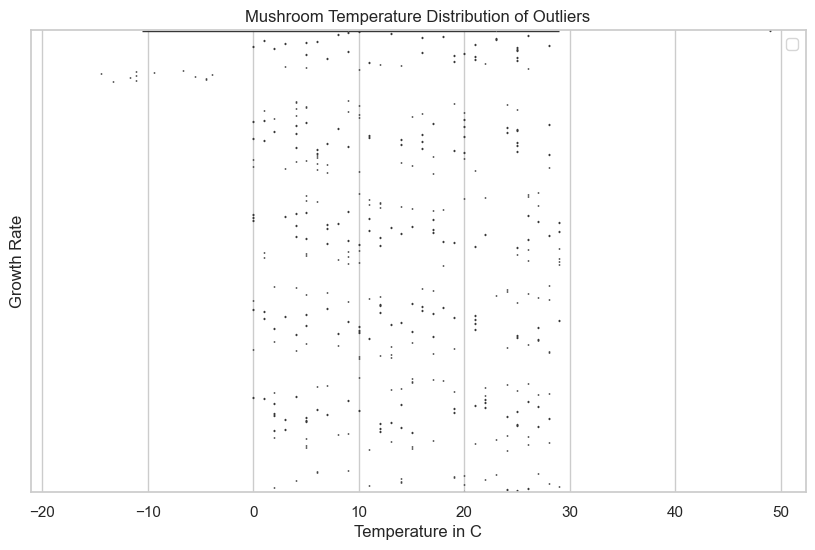

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/913998290.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mushroom_raw_df_tr["Temperature"],palette="coolwarm")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


16.0


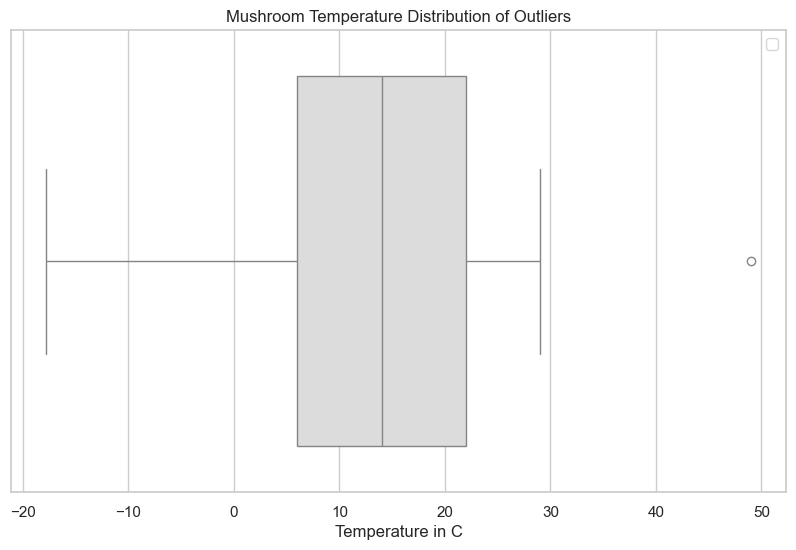

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cap Shape                 1000 non-null   object 
 1   Cap Color                 1000 non-null   object 
 2   Gill Size                 1000 non-null   object 
 3   Stalk Shape               1000 non-null   object 
 4   Habitat                   1000 non-null   object 
 5   Edibility                 1000 non-null   object 
 6   Market Demand             1000 non-null   object 
 7   Spore Print Color         1000 non-null   object 
 8   Population                1000 non-null   object 
 9   Odor                      1000 non-null   object 
 10  Bruising                  1000 non-null   object 
 11  Ring Type                 1000 non-null   object 
 12  Stalk Surface Above Ring  1000 non-null   object 
 13  Stalk Surface Below Ring  1000 non-null   object 
 14  Stalk Color A

In [14]:
# Identify outliers in "Temperature" column

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.boxplot(x="Temperature",y="Growth Rate",data=mushroom_raw_df_tr,palette="coolwarm")

plt.title("Mushroom Temperature Distribution of Outliers")
plt.xlabel("Temperature in C")
plt.yticks([])
plt.legend()
plt.show()


# By applying 3 quartiles 
# Q1 represents 25% of data value below this point
# Q2 represents 50% the median point
# Q3 represents 75% data value below this point
# By working out the difference between Q3 and Q1 to identify data points that are significantly higher or lower than the typical ranage.

Q1=mushroom_raw_df_tr["Temperature"].quantile(0.25)
Q3=mushroom_raw_df_tr["Temperature"].quantile(0.75)

outliers=Q3-Q1
print(outliers)

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.boxplot(x=mushroom_raw_df_tr["Temperature"],palette="coolwarm")
plt.title("Mushroom Temperature Distribution of Outliers")
plt.xlabel("Temperature in C")
plt.legend()
plt.show()

print(mushroom_raw_df_tr.info())

# With above mushroom temperature distribution visual, we learned the majority of mushroom growth happens in normal range temperatures, but the minority outliers. It also validated the weak positive correlation between "Growth Rate" and "Temperature" column from previous correlation analysis.

# With additional research about growing mushrooms in commercial cultivation farms, we need to include more columns to analyse the mushrooms to investigate what key attributes influence mushroom's Edibility.
# Identified columns are: "Growth Rate","Temperature","Incubation date","Habitat".

In [15]:
'''
# The only 2 key dated columns in datasets are "Inspection Date" and "Incubation Date", we need to convert them to datetime or numeric format
# "Incubation date"s "date" need to be renamed to "Date"

mushroom_raw_df_tr["Incubation Date"]=mushroom_raw_df_tr["Incubation date"]

mushroom_raw_df_tr["Inspection Date"]=pd.to_datetime(mushroom_raw_df_tr["Inspection Date"]) 
mushroom_raw_df_tr["Incubation Date"]=pd.to_datetime(mushroom_raw_df_tr["Incubation Date"]) 

# Drop "Incubation date" column
mushroom_raw_df_tr.drop(["Incubation date"],axis="columns",inplace=True)

#mushroom_raw_df_tr.info()
#mushroom_raw_df_tr.head(50)
'''

'\n# The only 2 key dated columns in datasets are "Inspection Date" and "Incubation Date", we need to convert them to datetime or numeric format\n# "Incubation date"s "date" need to be renamed to "Date"\n\nmushroom_raw_df_tr["Incubation Date"]=mushroom_raw_df_tr["Incubation date"]\n\nmushroom_raw_df_tr["Inspection Date"]=pd.to_datetime(mushroom_raw_df_tr["Inspection Date"]) \nmushroom_raw_df_tr["Incubation Date"]=pd.to_datetime(mushroom_raw_df_tr["Incubation Date"]) \n\n# Drop "Incubation date" column\nmushroom_raw_df_tr.drop(["Incubation date"],axis="columns",inplace=True)\n\n#mushroom_raw_df_tr.info()\n#mushroom_raw_df_tr.head(50)\n'

In [16]:
# Encode categorical "Habitat" column using OneHotEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder=LabelEncoder()
mushroom_raw_df_tr["Habitat"]=encoder.fit_transform(mushroom_raw_df_tr["Habitat"])

unique_habitats=mushroom_raw_df_tr["Habitat"].unique()
unique_habitats.sort()

## Validate unique 5 encoding: 0,1,2,3,4
print(unique_habitats)

#mushroom_raw_df_tr.info()
#mushroom_raw_df_tr.head(50)

[0 1 2 3 4]


# We've managed to cleanse our mushroom dataset by processing missing value with various of techniques. managed to cleanse our mushroom dataset by processing missing values with various techniques.
# Next we can carry out in depth analysis and process of "Edibility" column with treated new mush_Tr.csv

In [17]:
mush_Tr=pd.read_csv("/Users/eupirate/Desktop/CA_data_exp_visdual/mush_Tr.csv")
mush_Tr_with_id=mush_Tr.copy()
# Index "Mushroom ID" column
mush_Tr_with_id.insert(0,"Mushroom ID",range(1,1+len(mush_Tr_with_id)))
mush_Tr_with_id.set_index("Mushroom ID",inplace=True)
#mush_Tr_with_id.head(50)

# Let's consider the conditional probability of edibility of each categorical feature and create bins with numerical features.

# Habitat - habitat
# Growth Rate - GR
# Temperature - temp
# Incubation Date - ID
# Market Demand - MD

In [18]:
# Create bins for "Habitat" and calculate the probability 
prob_by_habitat=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby("Habitat")["Edibility"].apply(lambda x:(x=="edible").mean())
prob_by_habitat
# weak influence - we may don't have enough data

Habitat
0    0.497041
1    0.468966
2    0.470588
3    0.567273
4    0.456790
Name: Edibility, dtype: float64

In [19]:
# Create bins for "Growth Rate" and calculate the probability
# Create 4 quantile bins
GR_bins=pd.qcut(mush_Tr_with_id["Growth Rate"],q=4,duplicates="drop")
prob_by_GR_bins=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby(GR_bins)["Edibility"].apply(lambda x: (x == "edible").mean())
prob_by_GR_bins
# weak influence - we may don't have enough data

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/2481061382.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_by_GR_bins=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby(GR_bins)["Edibility"].apply(lambda x: (x == "edible").mean())


Growth Rate
(0.501, 1.378]     0.477273
(1.378, 2.543]     0.511211
(2.543, 3.747]     0.513393
(3.747, 21.512]    0.509091
Name: Edibility, dtype: float64

In [20]:
# Based on the wide range of temperature, we try to normalizae and standardize it
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
mush_Tr_with_id["Temperature"]=scaler.fit_transform(mush_Tr_with_id[["Temperature"]])
mush_Tr_with_id

# Create bins for "Temperature"and calculate the probability 
# Create 4 quantile bins
temp_bins=pd.qcut(mush_Tr_with_id["Temperature"],q=4,)
prob_by_temp_bins=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby(temp_bins)["Edibility"].apply(lambda x: (x == "edible").mean())
prob_by_temp_bins
# weak influence - we may don't have enough data

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/578456043.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_by_temp_bins=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby(temp_bins)["Edibility"].apply(lambda x: (x == "edible").mean())


Temperature
(-3.276, -0.815]    0.484716
(-0.815, 0.013]     0.482456
(0.013, 0.841]      0.486486
(0.841, 3.634]      0.562500
Name: Edibility, dtype: float64

In [21]:
# Convert "Incubation Date" to "Incubation Month" ensuring there are data for each month and calculate the probability 
mush_Tr_with_id["Incubation Date"]=pd.to_datetime(mush_Tr_with_id["Incubation Date"],errors="coerce")
# Now we have "Incubation Date" as datetime object, extract the mon
mush_Tr_with_id["Incubation Month"]=mush_Tr_with_id["Incubation Date"].dt.month
# Treate any missing values such as NaN and dropna
mush_Tr_with_id.dropna(subset=["Incubation Month"],inplace=True)
# Calculate the probability of each month
prob_by_ID_month=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby("Incubation Month")["Edibility"].apply(lambda x: (x == "edible").mean())
prob_by_ID_month
# weak influence - we may don't have enough data

Incubation Month
1    0.518519
2    0.485030
3    0.548913
4    0.486034
5    0.476923
Name: Edibility, dtype: float64

In [22]:
# Create bins for "Market Demand" and calculate the probability 
# Create 4 quantile bins
MD_bins=pd.qcut(mush_Tr_with_id["Market Demand"],q=4,duplicates="drop")
prob_by_MD_bins=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby(MD_bins)["Edibility"].apply(lambda x: (x == "edible").mean())
prob_by_MD_bins
# weak influence - we may don't have enough data

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/31661730.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_by_MD_bins=mush_Tr_with_id[mush_Tr_with_id["Edibility"]!="NotDefined_2"].groupby(MD_bins)["Edibility"].apply(lambda x: (x == "edible").mean())


Market Demand
(0.999, 3.0]    0.492795
(3.0, 5.0]      0.519737
(5.0, 7.0]      0.515528
(7.0, 10.0]     0.497797
Name: Edibility, dtype: float64

In [23]:
# ****From here onwards, will be generated a new version of csv ****

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import numpy as np

# Read from the latest processed cleansed csv
mush_Tr_with_id=pd.read_csv("/Users/eupirate/Desktop/CA_data_exp_visdual/mush_Tr_with_imputed_edibility.csv")

# Encode non numerica columns - as error 'sunken' fired up from "Cap Shape" column
encoders={}
for column in mush_Tr_with_id.columns:
    if mush_Tr_with_id[column].dtype==object and column != "Edibility":
        encode=LabelEncoder()
        mush_Tr_with_id[column]=encoder.fit_transform(mush_Tr_with_id[column].astype(str))
        encoders[column]=encoder
#encoders

In [25]:
# Replace "NotDefined_2" with NaN
mush_Tr_with_id["Edibility"]=mush_Tr_with_id["Edibility"].replace("NotDefined_2",np.nan)

## Apply KNN 1
## imputer=KNNImputer(n_neighbors=5)
## mush_Tr_with_id_imputed=imputer.fit_transform(mush_Tr_with_id)

# run code at this point, we get " ValueError: could not convert string to float: 'edible' "
# KNN can't process string but only numerical values. we will need to exclude "Edibility" and handle seprately 
# We temporarily remove "Edibility" column and then save it back after complete imputation 

edibility_column=mush_Tr_with_id["Edibility"]
mush_Tr_with_id=mush_Tr_with_id.drop("Edibility",axis=1)

# Apply KNN 2
imputer=KNNImputer(n_neighbors=5)
mush_Tr_with_id_imputed=imputer.fit_transform(mush_Tr_with_id)

# Convert imputed np arrary back to a DataFrame
mush_Tr_with_id_imputed=pd.DataFrame(mush_Tr_with_id_imputed,columns=mush_Tr_with_id.columns)

# Add "Edibility" column back to DataFrame
mush_Tr_with_id_imputed["Edibility"]=edibility_column.values

# mush_Tr_with_id_imputed

# Handle Mushroom ID column indexing
mush_Tr_with_id_imputed["Mushroom ID"] = mush_Tr_with_id_imputed.index+1

# output_file_path = "/Users/eupirate/Desktop/CA_data_exp_visdual/mush_Tr_with_imputed_edibility.csv"
# mush_Tr_with_id_imputed.to_csv(output_file_path, index=False)

# Export the latest csv file as "mush_Tr_with_imputed_edibility.csv" 

In [26]:
num_na_edibility=mush_Tr_with_id_imputed["Edibility"].isna().sum()
print(num_na_edibility)

113


# Now we split the "Edibility" values into 2 parts, known(edible, poisonous) and unknown (NaN)
# Our goal is to apply classification algorithm, use the part with known "Edibility" to train a classifier, and using "Edibility" as the target variable and the other features as predictors.

In [27]:
mush_Tr_with_id_imputed.head()

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Market Demand,Spore Print Color,Population,Odor,Bruising,...,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Temperature,Measurement,Incubation Date,Mushroom ID,Edibility
0,4.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,1.0,...,0.0,1.0,1.0,0.973096,1.615075e+18,49.000000,0.0,1.614643e+18,1,edible
1,2.0,0.0,1.0,1.0,3.0,2.0,1.0,3.0,3.0,1.0,...,4.0,1.0,2.0,0.502267,1.677974e+18,-10.555556,0.0,1.677888e+18,2,edible
2,3.0,0.0,0.0,0.0,0.0,8.0,4.0,2.0,4.0,1.0,...,2.0,0.0,1.0,1.977619,1.641600e+18,10.000000,0.0,1.641254e+18,3,edible
3,4.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0,1.0,...,2.0,1.0,3.0,2.272763,1.675987e+18,22.000000,0.0,1.675296e+18,4,poisonous
4,3.0,2.0,1.0,0.0,3.0,7.0,1.0,3.0,0.0,1.0,...,4.0,0.0,2.0,0.718874,1.673222e+18,9.000000,0.0,1.672790e+18,5,edible


In [28]:
known_edibility=mush_Tr_with_id_imputed[mush_Tr_with_id_imputed["Edibility"].notna()]
# known_edibility
known_edibility=known_edibility.copy()
# Encode "Edibility" column of all "known" values, we then can apply in classification algorithms
encoder=LabelEncoder()
known_edibility.loc[:,"Edibility_Encoded"]=encoder.fit_transform(known_edibility["Edibility"])


unknown_edibility=mush_Tr_with_id_imputed[mush_Tr_with_id_imputed["Edibility"].isna()]
unknown_edibility

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Market Demand,Spore Print Color,Population,Odor,Bruising,...,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Temperature,Measurement,Incubation Date,Mushroom ID,Edibility
6,3.0,0.0,0.0,1.0,4.0,5.0,4.0,2.0,3.0,1.0,...,4.0,1.0,2.0,4.320349,1.675814e+18,13.0,0.0,1.675469e+18,7,NaN
7,4.0,2.0,1.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,...,2.0,0.0,3.0,1.450597,1.675728e+18,2.0,0.0,1.675555e+18,8,NaN
10,4.0,3.0,0.0,0.0,3.0,3.0,0.0,1.0,2.0,1.0,...,3.0,1.0,0.0,9.468677,1.678579e+18,26.0,0.0,1.677974e+18,11,NaN
11,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,4.0,1.0,...,1.0,0.0,3.0,3.544818,1.683331e+18,6.0,0.0,1.682899e+18,12,NaN
16,3.0,1.0,0.0,1.0,3.0,10.0,2.0,4.0,1.0,1.0,...,0.0,0.0,3.0,4.745232,1.649290e+18,23.0,0.0,1.648944e+18,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,...,3.0,1.0,2.0,3.425501,1.673568e+18,19.0,0.0,1.672790e+18,969,NaN
980,2.0,2.0,1.0,0.0,0.0,5.0,1.0,1.0,2.0,1.0,...,2.0,0.0,3.0,4.052714,1.672704e+18,28.0,0.0,1.672531e+18,981,NaN
985,1.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0,...,2.0,0.0,3.0,1.679347,1.675382e+18,11.0,0.0,1.675210e+18,986,NaN
990,0.0,3.0,1.0,1.0,3.0,3.0,0.0,2.0,3.0,0.0,...,4.0,0.0,2.0,4.779821,1.672618e+18,29.0,0.0,1.672618e+18,991,NaN


In [29]:
# Apply KNN and Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Split data by known valued to train
from sklearn.model_selection import train_test_split
X=known_edibility.drop(["Edibility","Edibility_Encoded"],axis=1)
y=known_edibility["Edibility_Encoded"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
# Train KNN and Decision Tree classifier using training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Train the classifiers
knn=KNeighborsClassifier()
decision_tree=DecisionTreeClassifier()

knn.fit(X_train,y_train)
decision_tree.fit(X_train,y_train)

# Make prediction on the test
y_pred_knn=knn.predict(X_test)
y_pred_decision_tree=decision_tree.predict(X_test)

In [32]:
# Evaluate KNN classifier' scores:
from sklearn.metrics import classification_report,accuracy_score
print(f"KNN Accuracy:",accuracy_score(y_test,y_pred_knn))
print(f"KNN Classification Report:\n",classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.4157303370786517
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.39      0.38        83
           1       0.45      0.44      0.45        95

    accuracy                           0.42       178
   macro avg       0.41      0.41      0.41       178
weighted avg       0.42      0.42      0.42       178



KNN Accuracy score at: 0.4157303370786517, which is low. KNN don't perform well with our dataset.

In [33]:
# Evaluate Decision Tree classifier' scores:
print(f"Decision Tree Accuracy:",accuracy_score(y_test,y_pred_decision_tree))
print(f"Decision Tree Classification Report:\n",classification_report(y_test,y_pred_decision_tree))

Decision Tree Accuracy: 0.5224719101123596
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.54      0.51        83
           1       0.56      0.51      0.53        95

    accuracy                           0.52       178
   macro avg       0.52      0.52      0.52       178
weighted avg       0.53      0.52      0.52       178



Decision Tree Accuracy score at: 0.5224719101123596, it performed a little better than KNN classifier but not significantly.

In [34]:
# *** visualizations ***

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
mush_Tr_with_id_imputed["Edibility"]=mush_Tr_with_id_imputed["Edibility"].fillna("Unknown")

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/36589886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Edibility",data=mush_Tr_with_id_imputed,palette="coolwarm")


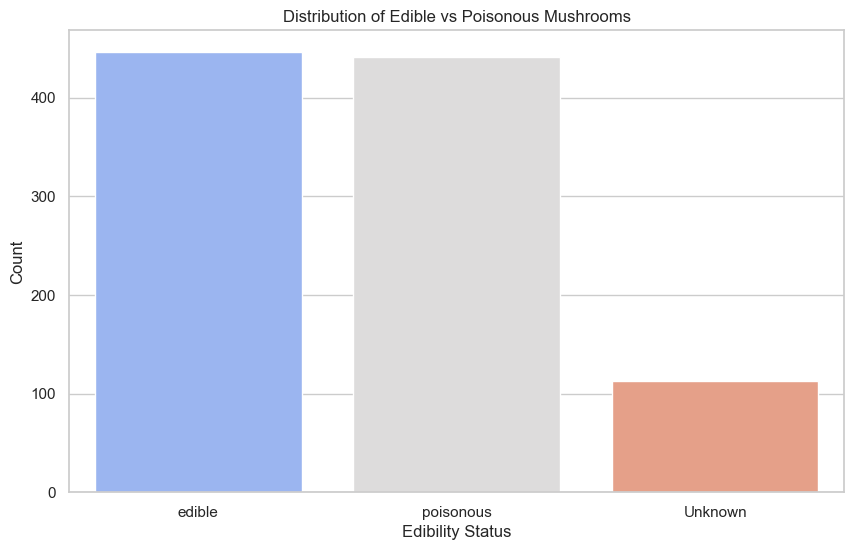

In [36]:
# Visualization 1 
# Distribution of Edible and Poisonous Mushroom ( Unclassified = Unknown )
plt.figure(figsize=(10, 6))
sns.countplot(x="Edibility",data=mush_Tr_with_id_imputed,palette="coolwarm")
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.ylabel("Count")
plt.xlabel("Edibility Status")
plt.show()

/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_18091/3090985685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Edibility", y="Market Demand",data=mush_Tr_with_id_imputed, palette="coolwarm")


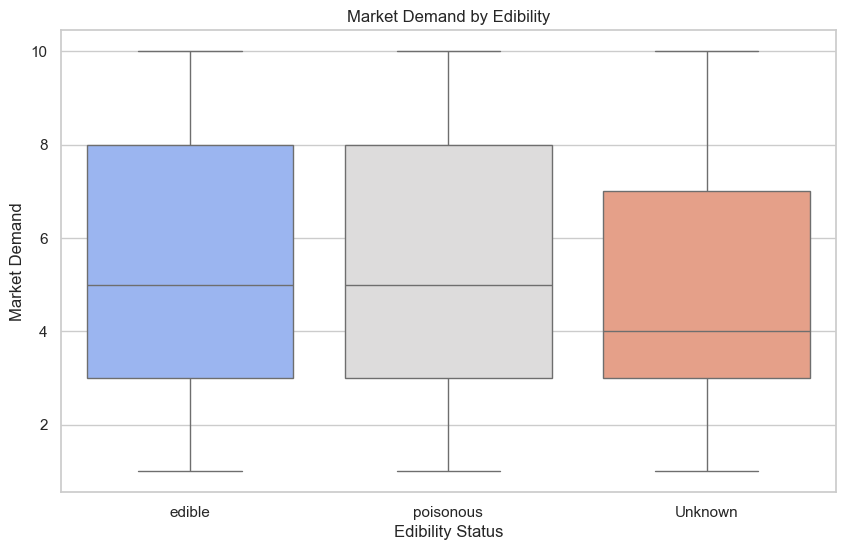

In [37]:
# Visualization 2
# Market Demand by EEdibility
plt.figure(figsize=(10, 6))
sns.boxplot(x="Edibility", y="Market Demand",data=mush_Tr_with_id_imputed, palette="coolwarm")
plt.title("Market Demand by Edibility")
plt.ylabel("Market Demand")
plt.xlabel("Edibility Status")
plt.show()

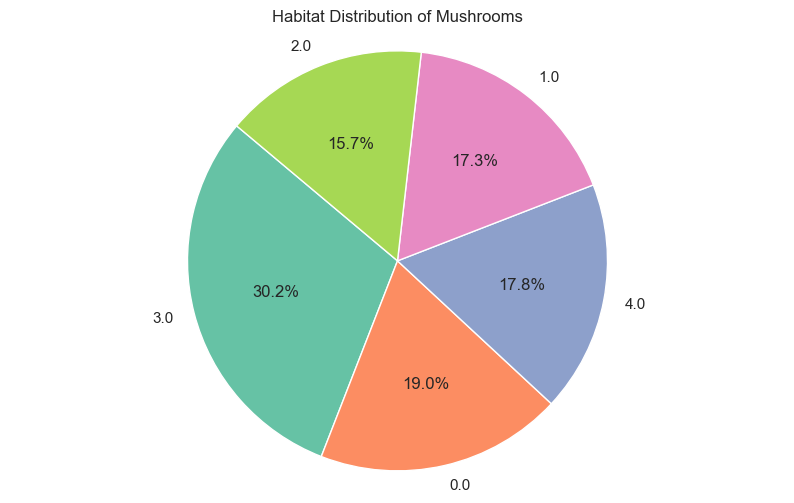

In [38]:
# Visualization 3
# Habitat Distribution of Mushrooms
plt.figure(figsize=(10, 6))
habitat_counts=mush_Tr_with_id_imputed["Habitat"].value_counts()
habitat_labels=habitat_counts.index
plt.pie(habitat_counts,labels=habitat_labels,autopct="%1.1f%%",startangle=140,colors=sns.color_palette("Set2"))
plt.title("Habitat Distribution of Mushrooms")
plt.axis("equal")  
plt.show()

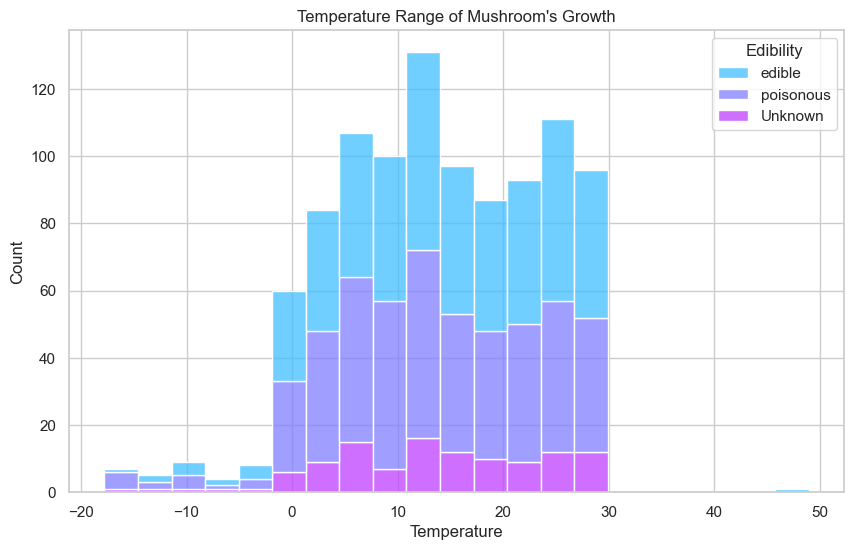

In [39]:
# Visualization 4
# Temperature Range for Mushroom Growth
plt.figure(figsize=(10, 6))
sns.histplot(data=mush_Tr_with_id_imputed,x="Temperature", hue="Edibility", multiple="stack", palette="cool")
plt.title("Temperature Range of Mushroom's Growth")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

Conclusion:

Consider the risk of mushroom's Edibility when wrong predictions are made can be dangerous.
Given the datase and dictionary, we don't know how the raw data was collected, processed, were there human errors or sensor errors.

According to the Mushroom's Edibility Unknown category data, it is not positioned in extreme low or high of Market Demand, so it’s worth exploring further to unfold the potential commercial value.

For the business standpoint, we would recommend holding these mushrooms off for sales for further analysis, testing and classifying.
We recommend consulting with domain experts and seek their advice, based on these mushroom's characteristics and what additional features we should explore and identify for official certification if they turned out to be Edible.

With additional research, we are recommending these resources for this agriculture company seeking professional advice and evaluating the current classification process and obtaining ISO standard to prevent unknown, low quality data leaking into the rest of the business pipeline.

According to data, China, US and Japan are the highest mushroom producers in the world. Here are some useful resources to assist.
